<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/tensors/tensors_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Rest

### Some Random stfuff related to classification

In [2]:
# creating circles using scikit-learn's make_circles()
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(
    n_samples,
    noise = 0.03,
    random_state = 0
)
# x is a matrix of values
# y is array of labels , reprsenting an array belongs to which class, this one gives 2 classes, so the labels are [0,1]

In [3]:
x, y[:10]

(array([[ 0.80993549, -0.053514  ],
        [-0.13448628, -0.74209474],
        [-0.81250606, -0.62424399],
        ...,
        [-0.03234372,  0.73742125],
        [ 0.60763385,  0.52905531],
        [-0.55730617,  0.57250972]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1]))

In [4]:
# using pandas to make dataframe and labels
circles = pd.DataFrame({
    'x0' : x[:,0],  # first column as x0
    'x1' : x[:,1],  # second column as x1
    'label' : y # labels column , belonging to either first or second class
})

circles.head()

,x0,x1,label
0,0.809935,-0.053514,1
1,-0.134486,-0.742095,1
2,-0.812506,-0.624244,0
3,0.583074,0.496568,1
4,-0.461320,0.659836,1


In [5]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

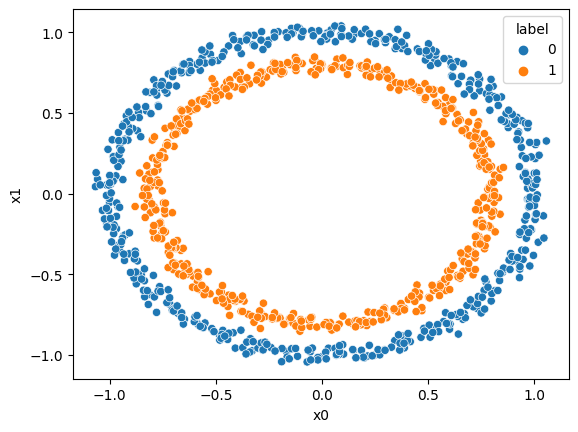

In [6]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x, y,
    test_size = 0.19,
    train_size = 0.81
)

# visualizing the plots
sns.scatterplot(
    # x = x[:, 0],
    # y = x[:,1],
    data = circles,
    x = 'x0',
    y = 'x1',
    hue = 'label',
)


input_shape = [x.shape[1]]

In [7]:
from tensorflow import keras
from keras import layers, Sequential

# Create the model
model_one = Sequential([
    layers.Dense(1),
    layers.Dense(1),
])

# compile the model
model_one.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(),
    metrics = ['accuracy']
)

# fit/train the model
history = model_one.fit(
    x, y,
    epochs = 200,
    verbose = 0
)
# history.history['accuracy']

model_one.evaluate(x, y)


32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934654116630554, 0.5]

<Axes: >

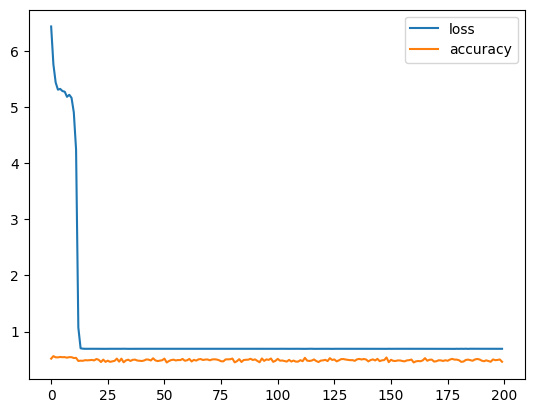

In [8]:
pd.DataFrame(history.history).plot()

This is not good to have accuracy of 50%, which is equivalent to guessing as it is binary.

Making the model more complex

In [9]:
# Create the model
model_two = Sequential([
    layers.Dense(
        units = 80,
        activation = 'relu',
        input_shape = input_shape
    ),
    layers.Dense(
        units = 80,
        activation= 'relu'
    ),
    layers.Dense(
        units = 1
    )
])

# compile the model
model_two.compile(
    loss = keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
    optimizer = keras.optimizers.SGD()
)

# fit/train the model
history = model_two.fit(
    x_train, y_train,
    epochs = 60,
    verbose = 0
)

# evaluating the model
model_two.evaluate(x_valid, y_valid)

6/6 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 1.0000


[0.08487585186958313, 1.0]

<Axes: >

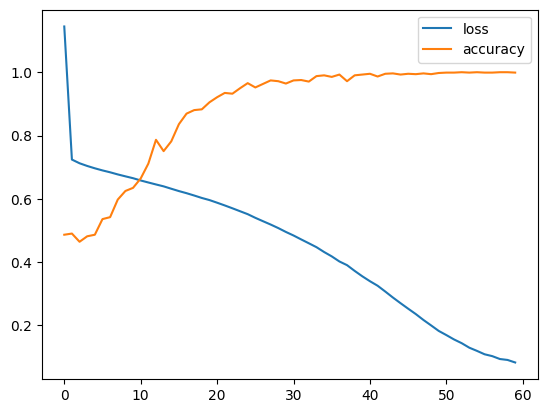

In [10]:
pd.DataFrame(history.history).plot()

## Multi-Class Classification

Using tensorflow's dataset , `tf.keras.datasets`
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist#labels)

In [61]:
#@title Loading and Labelling the dataset
# importing the dataset
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

label_names = [
    'Tshirt/Top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]
print(label_names)
train_data.shape, train_label.shape, test_data.shape, test_label.shape

['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Index : 48364 , Item Type : Tshirt/Top


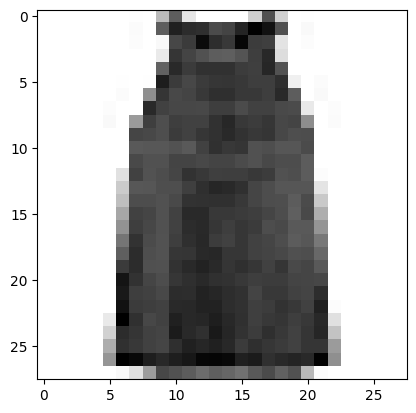

In [62]:
# visualizing  a random item in the list , we need to convert this data to image as it is in pixel information format
index = np.random.randint(0,60000)
item_type = label_names[train_label[index]]
print(f"Index : {index} , Item Type : {item_type}")
plt.imshow(train_data[index], cmap  = plt.cm.binary)  # changing it to binary or black/white

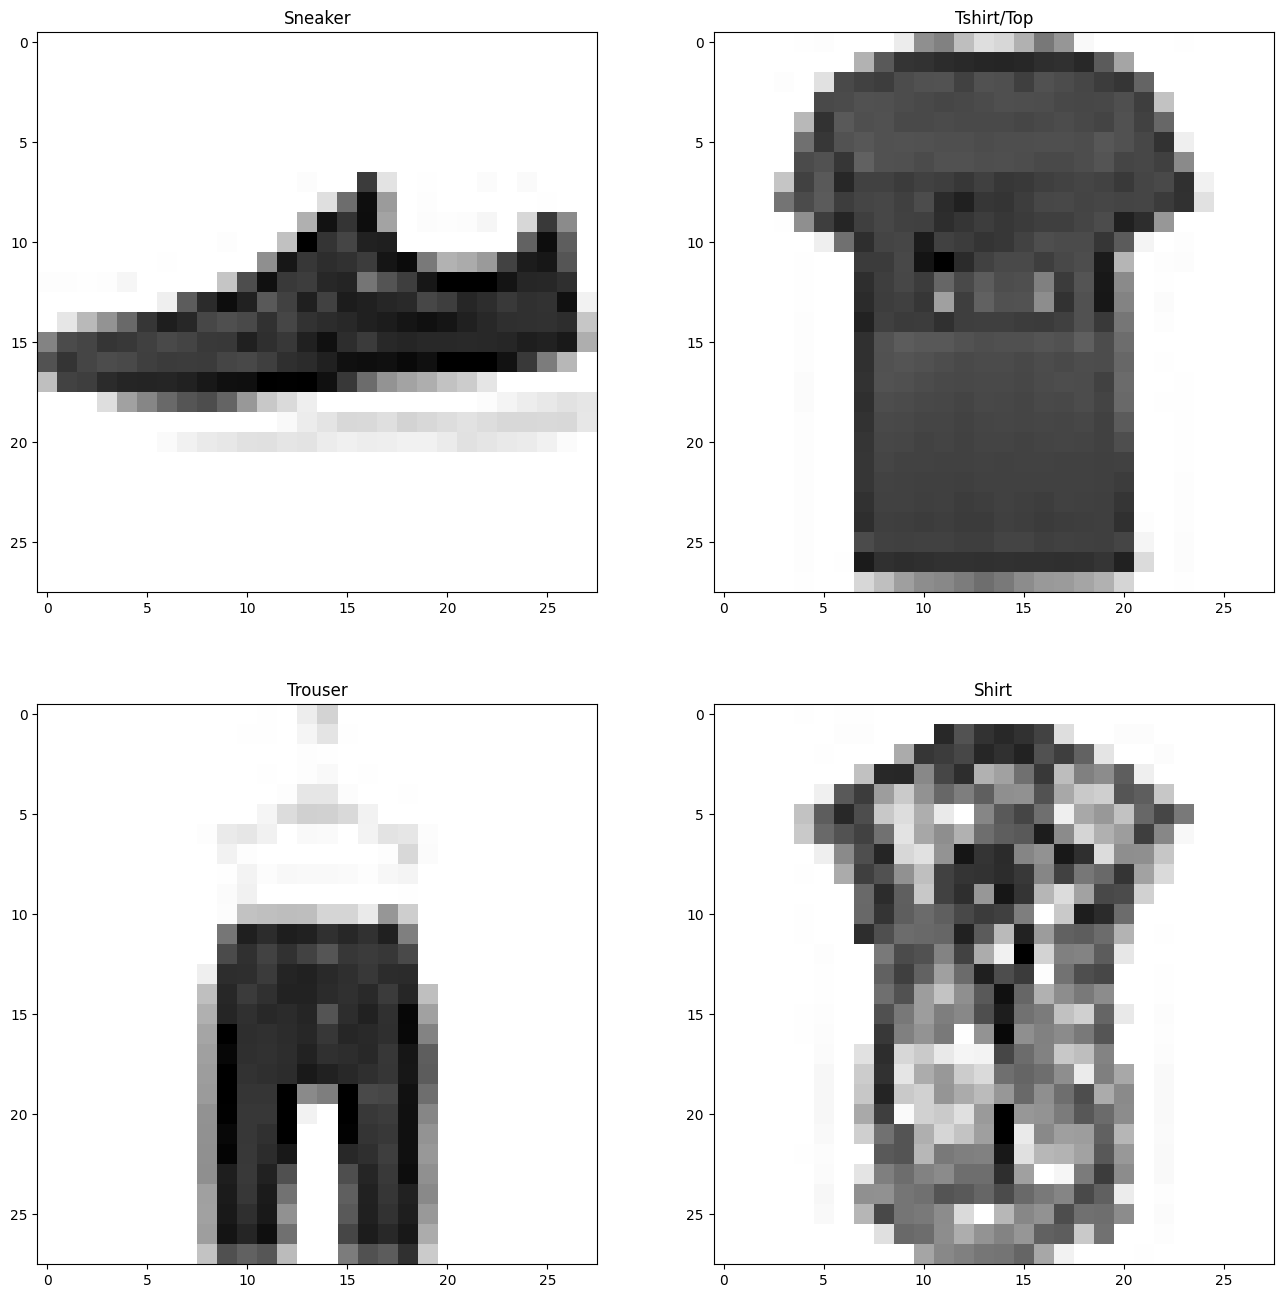

In [63]:
# plotting randomly 4 items
plt.figure(figsize = (16, 16))

for i in range(4):
    axis = plt.subplot(2, 2, i+1)
    index = np.random.randint(0,60000)
    plt.imshow(train_data[index], cmap = plt.cm.binary)
    plt.title(label_names[train_label[index]])
    plt.axis = False

In [ ]:
#@title Model-Six

from tensorflow import keras
from keras import layers, Sequential

# create the model
model_six = Sequential([
    layers.Flatten(
        input_shape = (28, 28) # using flatten  to convert the 2D representation to a vector
    ),
    layers.Dense(
        units = 8,
        activation = 'relu',
    ),
    layers.Dense(
        units = 8,
        activation = 'relu'
    ),
    layers.Dense(
        units =  10,
        activation = 'softmax' # Softmax is well-suited for this task because it provides a probability distribution over all classes, allowing you to choose the class with the highest probability as the predicted class.
    )
])

# compile the model
model_six.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# fit / train the model
non_normalized_history = model_six.fit(
    train_data, train_label,
    epochs = 50,
    validation_data = (test_data, test_label) # to see how does the model perform on test set during training
)

In [54]:
model_six.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8486


[0.4406118094921112, 0.8485999703407288]

In [65]:
# scaling the data between 0-1
train_data, test_data = train_data/255.0, test_data/255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [66]:
#@title Model-Seven
# create the model
model_seven = Sequential([
    layers.Flatten(input_shape = (28, 28)) ,
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 20,
        activation = 'relu'
    ),
    layers.Dense(
        units = 10,
        activation = 'softmax'
    )
])

# compile the model
model_seven.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = [
        'accuracy'
    ]
)

# fit/ train the model
norm_history = model_seven.fit(
    train_data, train_label ,
    epochs = 20,
    # validation_data = {test_data, test_label}
)

model_seven.evaluate(test_data, test_label)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5978 - accuracy: 0.7922
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4339 - accuracy: 0.8473
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4009 - accuracy: 0.8567
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3766 - accuracy: 0.8642
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3614 - accuracy: 0.8696
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3491 - accuracy: 0.8723
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8752
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3306 - accuracy: 0.8789
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8833
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.318

[0.38492298126220703, 0.8673999905586243]